In [85]:
import torch
import torchvision

In [64]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [65]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [66]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [67]:
example_data.shape

torch.Size([1000, 1, 28, 28])

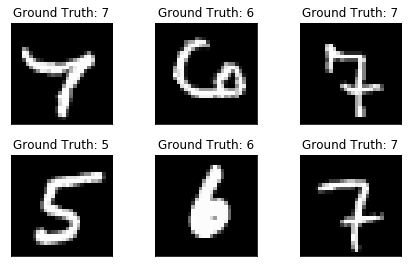

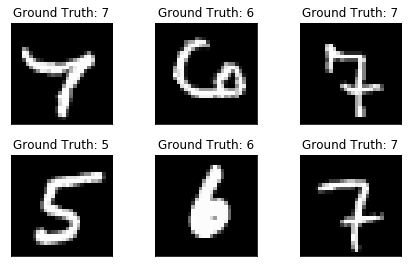

In [68]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [69]:
%matplotlib inline

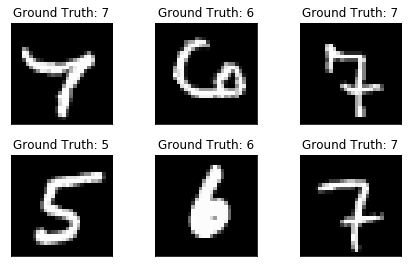

In [70]:
fig

In [71]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [72]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [73]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [74]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [75]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), './results/model.pth')
      torch.save(optimizer.state_dict(), './results/optimizer.pth')

In [76]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [77]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.3004, Accuracy: 751/10000 (7%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.268458
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.268337
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.274000
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.251669
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.236826
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.223578
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.153440
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.096371
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.974112
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.944348
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.839604
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.765900
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.699910
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.690938
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.508513
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.390797
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.280941
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.327434
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.275460
Train Epoch: 1 [12160/6

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.413121
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.462657
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.459541
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.405157
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.273408
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.263105
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.490822
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.357146
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.362542
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.316220
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.281817
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.435021
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.192659
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.401685
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.395814
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.283655
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.334296
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.357544
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.652199
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.335577


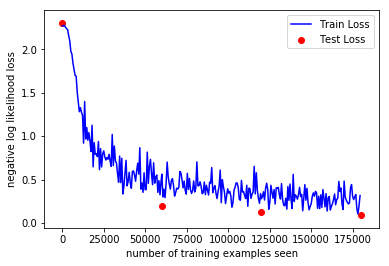

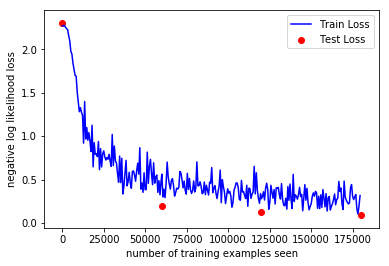

In [78]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [79]:
with torch.no_grad():
  output = network(example_data)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


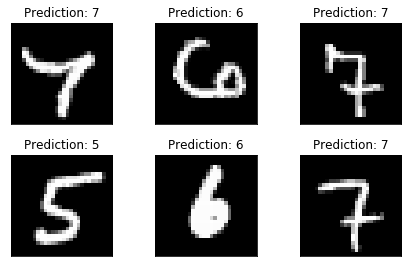

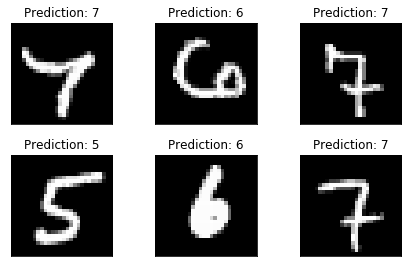

In [80]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [81]:
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)

In [82]:
network_state_dict = torch.load('./results/model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('./results/optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

In [83]:
for i in range(4,9):
  test_counter.append(i*len(train_loader.dataset))
  train(i)
  test()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 4 [0/60000 (0%)]	Loss: 0.336779
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.305568
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.180691
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.149591
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.366106
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.572886
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.302352
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.290035
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.319584
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.237249
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.527303
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.190448
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.259755
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.178832
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.281053
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.168414
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.151202
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.256148
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.367750
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.313461
Train Epoch: 4 [12800/60000 (

Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.229430
Train Epoch: 5 [45440/60000 (76%)]	Loss: 0.136218
Train Epoch: 5 [46080/60000 (77%)]	Loss: 0.235169
Train Epoch: 5 [46720/60000 (78%)]	Loss: 0.416289
Train Epoch: 5 [47360/60000 (79%)]	Loss: 0.391155
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.134183
Train Epoch: 5 [48640/60000 (81%)]	Loss: 0.227143
Train Epoch: 5 [49280/60000 (82%)]	Loss: 0.415909
Train Epoch: 5 [49920/60000 (83%)]	Loss: 0.103968
Train Epoch: 5 [50560/60000 (84%)]	Loss: 0.159855
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.248541
Train Epoch: 5 [51840/60000 (86%)]	Loss: 0.298459
Train Epoch: 5 [52480/60000 (87%)]	Loss: 0.352754
Train Epoch: 5 [53120/60000 (88%)]	Loss: 0.225884
Train Epoch: 5 [53760/60000 (90%)]	Loss: 0.201382
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.123722
Train Epoch: 5 [55040/60000 (92%)]	Loss: 0.252109
Train Epoch: 5 [55680/60000 (93%)]	Loss: 0.505853
Train Epoch: 5 [56320/60000 (94%)]	Loss: 0.120993
Train Epoch: 5 [56960/60000 (95%)]	Loss: 0.300087


Train Epoch: 7 [28800/60000 (48%)]	Loss: 0.210027
Train Epoch: 7 [29440/60000 (49%)]	Loss: 0.208038
Train Epoch: 7 [30080/60000 (50%)]	Loss: 0.265584
Train Epoch: 7 [30720/60000 (51%)]	Loss: 0.266067
Train Epoch: 7 [31360/60000 (52%)]	Loss: 0.223968
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.307220
Train Epoch: 7 [32640/60000 (54%)]	Loss: 0.327115
Train Epoch: 7 [33280/60000 (55%)]	Loss: 0.205304
Train Epoch: 7 [33920/60000 (57%)]	Loss: 0.213059
Train Epoch: 7 [34560/60000 (58%)]	Loss: 0.529449
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.101230
Train Epoch: 7 [35840/60000 (60%)]	Loss: 0.156813
Train Epoch: 7 [36480/60000 (61%)]	Loss: 0.105690
Train Epoch: 7 [37120/60000 (62%)]	Loss: 0.214144
Train Epoch: 7 [37760/60000 (63%)]	Loss: 0.147144
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.081575
Train Epoch: 7 [39040/60000 (65%)]	Loss: 0.268669
Train Epoch: 7 [39680/60000 (66%)]	Loss: 0.211046
Train Epoch: 7 [40320/60000 (67%)]	Loss: 0.165617
Train Epoch: 7 [40960/60000 (68%)]	Loss: 0.298355


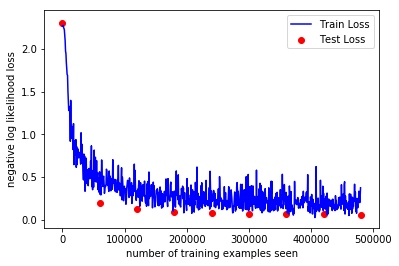

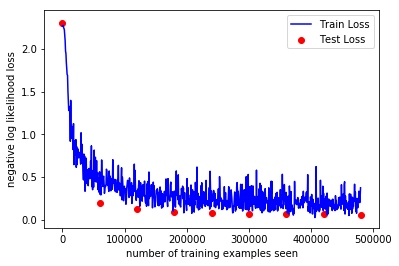

In [84]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig